In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

data_path = "/is/rg/al/Data/solo12_data"


# Set up matplotlib config

In [5]:
%load_ext autoreload
%autoreload 2




# set up matplotlib

import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots import figsizes, fontsizes

plt.rcParams.update(bundles.icml2022())

sizes = plt.rcParams.copy()

figsize_hhalf = sizes['figure.figsize'][0] / 2, sizes['figure.figsize'][1]
new_figsize = sizes['figure.figsize'][0], sizes['figure.figsize'][1] /2.0
sizes = figsizes.neurips2023(ncols=1)
new_figsize = sizes['figure.figsize'][0], sizes['figure.figsize'][1] /2.0
figsize_full = sizes['figure.figsize'][0], sizes['figure.figsize'][1]
figsize_75 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.75
figsize_25 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.25
figsize_40 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.4
figsize_30 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.3
figsize_70 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.7


# COLORS = "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"

COLORS = "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"


COLORS_FLOATING_POINT = [
    (0.368,0.507,0.71), # blue
    (0.881,0.611,0.142), # orange
    (.56,0.692,0.195), # green
    (0.923,0.386,0.209), # red
    (0.528,0.471,0.701), # purple
    (0.772,0.432,0.102), # brown
    (0.364,0.619,0.782) # cyan
]

# AL group color scheme
COLORS = []
for (r,g,b) in COLORS_FLOATING_POINT:
    # print("#%02x%02x%02x" % (int(r*255), int(g*255), int(b*255)))
    COLORS.append("#%02x%02x%02x" % (int(r*255), int(g*255), int(b*255)))





In [40]:
print(COLORS)

['#5d81b5', '#e09b24', '#8eb031', '#eb6235', '#8678b2', '#c46e1a', '#5c9dc7']


# Plots

In [3]:
df62 = pd.read_csv(f"{data_path}/1_controllability/62/logged_data/log_data.csv")
df68 = pd.read_csv(f"{data_path}/1_controllability/68/logged_data/log_data.csv")
df92 = pd.read_csv(f"{data_path}/1_controllability/92/logged_data/log_data.csv")
df98 = pd.read_csv(f"{data_path}/1_controllability/98/logged_data/log_data.csv")

# print(df68.shape)
# print(df68.columns.values)
# print(df68.head(10))

FileNotFoundError: [Errno 2] No such file or directory: '/is/rg/al/Data/solo12_data/1_controllability/62/logged_data/log_data.csv'

In [ ]:
x68 = [df68.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y68 = [df68.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]

x62 = [df62.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y62 = [df62.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]

x92 = [df92.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y92 = [df92.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]

x98 = [df98.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y98 = [df98.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]

# print(len(x68[0]))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=x68[0], y=y68[0], c="b")
ax.set(title="traj_68_0")
plt.show()

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 8))

fig, ax = plt.subplots()
for i in range(8):
    ax.scatter(x=x68[i], y=y68[i], s=50, color=colors[i], alpha=0.2, label=f"skill {i}")
ax.set(title="trajectories_68")
ax.legend()
plt.axis('square')
ax.grid(True)
plt.show()

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 8))

fig, ax = plt.subplots()
for i in range(8):
    ax.scatter(x=x92[i], y=y92[i], s=50, color=colors[i], alpha=0.2, label=f"skill {i}")
ax.set(title="trajectories_92")
ax.legend()
plt.axis('square')
ax.grid(True)
plt.show()

In [ ]:
def flatten(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

al = 0.03
si = 50
fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(x=flatten(x62), y=flatten(y62), s=si, color='g', alpha=al, label=f"alpha = 0.6, l0 = 2")
axs[0, 1].scatter(x=flatten(x68), y=flatten(y68), s=si, color='b', alpha=al, label=f"alpha = 0.6, l0 = 8")
axs[1, 0].scatter(x=flatten(x92), y=flatten(y92), s=si, color='r', alpha=al, label=f"alpha = 0.9, l0 = 2")
axs[1, 1].scatter(x=flatten(x98), y=flatten(y98), s=si, color='c', alpha=al, label=f"alpha = 0.9, l0 = 8")

for ax in axs.flat:
    ax.legend(loc='upper right')
    ax.grid(True)
    ax.set_xlim(0.0, 4.0)
    ax.set_ylim(3.0, 5.5)
plt.suptitle("trajectories for all skills")
plt.show()

In [ ]:
df62 = pd.read_csv(f"{data_path}/1_controllability/62/logged_data/log_data.csv")
df68 = pd.read_csv(f"{data_path}/1_controllability/68/logged_data/log_data.csv")
df64 = pd.read_csv(f"{data_path}/1_controllability/64/logged_data/log_data.csv")
df66 = pd.read_csv(f"{data_path}/1_controllability/66/logged_data/log_data.csv")
x68 = [df68.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y68 = [df68.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
x62 = [df62.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y62 = [df62.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
x64 = [df64.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y64 = [df64.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
x66 = [df66.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y66 = [df66.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]

def flatten(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

al = 0.03
si = 50
fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(x=flatten(x62), y=flatten(y62), s=si, color='g', alpha=al, label=f"alpha = 0.6, l0 = 2")
axs[0, 1].scatter(x=flatten(x64), y=flatten(y64), s=si, color='b', alpha=al, label=f"alpha = 0.6, l0 = 4")
axs[1, 0].scatter(x=flatten(x66), y=flatten(y66), s=si, color='r', alpha=al, label=f"alpha = 0.6, l0 = 6")
axs[1, 1].scatter(x=flatten(x68), y=flatten(y68), s=si, color='c', alpha=al, label=f"alpha = 0.6, l0 = 8")

for ax in axs.flat:
    ax.legend(loc='upper right')
    ax.grid(True)
    ax.set_xlim(0.0, 4.0)
    ax.set_ylim(2.5, 5.5)
plt.suptitle("trajectories for all skills")
plt.show()

In [ ]:
df_onbox_62 = pd.read_csv(f"{data_path}/1_controllability/62/logged_data/log_data_f.csv")
df_onbox_62_ = pd.read_csv(f"{data_path}/1_controllability/62_/logged_data/log_data_f.csv")
df_onbox_62__ = pd.read_csv(f"{data_path}/1_controllability/62__/logged_data/log_data_f.csv")

df_onbox_68 = pd.read_csv(f"{data_path}/1_controllability/68/logged_data/log_data_f.csv")
df_onbox_68_ = pd.read_csv(f"{data_path}/1_controllability/68_/logged_data/log_data_f.csv")
df_onbox_68__ = pd.read_csv(f"{data_path}/1_controllability/68__/logged_data/log_data_f.csv")

df_onbox_82 = pd.read_csv(f"{data_path}/1_controllability/82/logged_data/log_data_f.csv")
df_onbox_82_ = pd.read_csv(f"{data_path}/1_controllability/82_/logged_data/log_data_f.csv")
df_onbox_82__ = pd.read_csv(f"{data_path}/1_controllability/82__/logged_data/log_data_f.csv")

df_onbox_88 = pd.read_csv(f"{data_path}/1_controllability/88/logged_data/log_data_f.csv")
df_onbox_88_ = pd.read_csv(f"{data_path}/1_controllability/88_/logged_data/log_data_f.csv")
df_onbox_88__ = pd.read_csv(f"{data_path}/1_controllability/88__/logged_data/log_data_f.csv")


x_onbox_62 = [df_onbox_62.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_onbox_62 = [df_onbox_62.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_onbox_62[i].extend(df_onbox_62_.loc[:, f'root_pos_x_{i}'].tolist())
    y_onbox_62[i].extend(df_onbox_62_.loc[:, f'root_pos_y_{i}'].tolist())
    x_onbox_62[i].extend(df_onbox_62__.loc[:, f'root_pos_x_{i}'].tolist())
    y_onbox_62[i].extend(df_onbox_62__.loc[:, f'root_pos_y_{i}'].tolist())
    
x_onbox_68 = [df_onbox_68.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_onbox_68 = [df_onbox_68.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_onbox_68[i].extend(df_onbox_68_.loc[:, f'root_pos_x_{i}'].tolist())
    y_onbox_68[i].extend(df_onbox_68_.loc[:, f'root_pos_y_{i}'].tolist())
    x_onbox_68[i].extend(df_onbox_68__.loc[:, f'root_pos_x_{i}'].tolist())
    y_onbox_68[i].extend(df_onbox_68__.loc[:, f'root_pos_y_{i}'].tolist())
    
x_onbox_82 = [df_onbox_82.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_onbox_82 = [df_onbox_82.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_onbox_82[i].extend(df_onbox_82_.loc[:, f'root_pos_x_{i}'].tolist())
    y_onbox_82[i].extend(df_onbox_82_.loc[:, f'root_pos_y_{i}'].tolist())
    x_onbox_82[i].extend(df_onbox_82__.loc[:, f'root_pos_x_{i}'].tolist())
    y_onbox_82[i].extend(df_onbox_82__.loc[:, f'root_pos_y_{i}'].tolist())
    
x_onbox_88 = [df_onbox_88.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_onbox_88 = [df_onbox_88.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_onbox_88[i].extend(df_onbox_88_.loc[:, f'root_pos_x_{i}'].tolist())
    y_onbox_88[i].extend(df_onbox_88_.loc[:, f'root_pos_y_{i}'].tolist())
    x_onbox_88[i].extend(df_onbox_88__.loc[:, f'root_pos_x_{i}'].tolist())
    y_onbox_88[i].extend(df_onbox_88__.loc[:, f'root_pos_y_{i}'].tolist())

def flatten(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

al = 0.01
si = 50

fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(x=flatten(x_onbox_62), y=flatten(y_onbox_62), s=si, color='g', alpha=al, label=f"alpha = 0.6, l0 = 2")
axs[0, 1].scatter(x=flatten(x_onbox_68), y=flatten(y_onbox_68), s=si, color='b', alpha=al, label=f"alpha = 0.6, l0 = 8")
axs[1, 0].scatter(x=flatten(x_onbox_82), y=flatten(y_onbox_82), s=si, color='r', alpha=al, label=f"alpha = 0.8, l0 = 2")
axs[1, 1].scatter(x=flatten(x_onbox_88), y=flatten(y_onbox_88), s=si, color='y', alpha=al, label=f"alpha = 0.8, l0 = 8")

for ax in axs.flat:
    ax.legend(loc='upper right')
    ax.grid(True)
    ax.set_xlim(1.0, 4.0)
    ax.set_ylim(3.0, 6.0)
plt.suptitle("on box trajectories for all skills, 3 seeds")
plt.show()

# al = 0.5
# si = 50
# fig, ax = plt.subplots()

# ax.scatter(x=flatten(x_onbox_68), y=flatten(y_onbox_68), s=si, color='g', alpha=al, label=f"alpha = 0.6, l0 = 8")
# ax.scatter(x=flatten(x_onbox_62), y=flatten(y_onbox_62), s=si, color='b', alpha=al, label=f"alpha = 0.6, l0 = 2")
# ax.scatter(x=flatten(x_onbox_88), y=flatten(y_onbox_88), s=si, color='r', alpha=al, label=f"alpha = 0.8, l0 = 8")
# ax.scatter(x=flatten(x_onbox_82), y=flatten(y_onbox_82), s=si, color='y', alpha=al, label=f"alpha = 0.8, l0 = 2")

# ax.legend(loc='upper right')
# ax.grid(True)
# ax.set_xlim(1.5, 4.0)
# ax.set_ylim(3.0, 6.0)
# plt.suptitle("trajectories for all skills, 3 seeds")
# plt.show()


In [ ]:
import matplotlib.patches as patches

df_behindbox_62 = pd.read_csv(f"{data_path}/1_controllability/62/logged_data/log_data_ff.csv")
df_behindbox_62_ = pd.read_csv(f"{data_path}/1_controllability/62_/logged_data/log_data_ff.csv")
df_behindbox_62__ = pd.read_csv(f"{data_path}/1_controllability/62__/logged_data/log_data_ff.csv")

df_behindbox_68 = pd.read_csv(f"{data_path}/1_controllability/68/logged_data/log_data_ff.csv")
df_behindbox_68_ = pd.read_csv(f"{data_path}/1_controllability/68_/logged_data/log_data_ff.csv")
df_behindbox_68__ = pd.read_csv(f"{data_path}/1_controllability/68__/logged_data/log_data_ff.csv")

df_behindbox_82 = pd.read_csv(f"{data_path}/1_controllability/82/logged_data/log_data_ff.csv")
df_behindbox_82_ = pd.read_csv(f"{data_path}/1_controllability/82_/logged_data/log_data_ff.csv")
df_behindbox_82__ = pd.read_csv(f"{data_path}/1_controllability/82__/logged_data/log_data_ff.csv")

df_behindbox_88 = pd.read_csv(f"{data_path}/1_controllability/88/logged_data/log_data_ff.csv")
df_behindbox_88_ = pd.read_csv(f"{data_path}/1_controllability/88_/logged_data/log_data_ff.csv")
df_behindbox_88__ = pd.read_csv(f"{data_path}/1_controllability/88__/logged_data/log_data_ff.csv")


x_behindbox_62 = [df_behindbox_62.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_62 = [df_behindbox_62.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_62[i].extend(df_behindbox_62_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_62[i].extend(df_behindbox_62_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_62[i].extend(df_behindbox_62__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_62[i].extend(df_behindbox_62__.loc[:, f'root_pos_y_{i}'].tolist())
    
x_behindbox_68 = [df_behindbox_68.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_68 = [df_behindbox_68.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_68[i].extend(df_behindbox_68_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_68[i].extend(df_behindbox_68_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_68[i].extend(df_behindbox_68__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_68[i].extend(df_behindbox_68__.loc[:, f'root_pos_y_{i}'].tolist())
    
x_behindbox_82 = [df_behindbox_82.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_82 = [df_behindbox_82.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_82[i].extend(df_behindbox_82_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_82[i].extend(df_behindbox_82_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_82[i].extend(df_behindbox_82__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_82[i].extend(df_behindbox_82__.loc[:, f'root_pos_y_{i}'].tolist())
    
x_behindbox_88 = [df_behindbox_88.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_88 = [df_behindbox_88.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_88[i].extend(df_behindbox_88_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_88[i].extend(df_behindbox_88_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_88[i].extend(df_behindbox_88__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_88[i].extend(df_behindbox_88__.loc[:, f'root_pos_y_{i}'].tolist())

def flatten(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

al = 0.02
si = 50

fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(x=flatten(x_behindbox_62), y=flatten(y_behindbox_62), s=si, color='g', alpha=al, label=f"alpha = 0.6, l0 = 2")
axs[0, 1].scatter(x=flatten(x_behindbox_68), y=flatten(y_behindbox_68), s=si, color='b', alpha=al, label=f"alpha = 0.6, l0 = 8")
axs[1, 0].scatter(x=flatten(x_behindbox_82), y=flatten(y_behindbox_82), s=si, color='r', alpha=al, label=f"alpha = 0.8, l0 = 2")
axs[1, 1].scatter(x=flatten(x_behindbox_88), y=flatten(y_behindbox_88), s=si, color='y', alpha=al, label=f"alpha = 0.8, l0 = 8")

for ax in axs.flat:
    ax.legend(loc='upper right')
    ax.grid(True)
    rect = patches.Rectangle((1.25, 3.25), 1.5, 1.5, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.axis('square')
    ax.set_xlim(0.0, 4.0)
    ax.set_ylim(2.0, 6.0)
plt.suptitle("behind box trajectories for all skills, 3 seeds")
plt.show()

# al = 0.5
# si = 50
# fig, ax = plt.subplots()

# ax.scatter(x=flatten(x_behindbox_68), y=flatten(y_behindbox_68), s=si, color='g', alpha=al, label=f"alpha = 0.6, l0 = 8")
# ax.scatter(x=flatten(x_behindbox_62), y=flatten(y_behindbox_62), s=si, color='b', alpha=al, label=f"alpha = 0.6, l0 = 2")
# ax.scatter(x=flatten(x_behindbox_88), y=flatten(y_behindbox_88), s=si, color='r', alpha=al, label=f"alpha = 0.8, l0 = 8")
# ax.scatter(x=flatten(x_behindbox_82), y=flatten(y_behindbox_82), s=si, color='y', alpha=al, label=f"alpha = 0.8, l0 = 2")

# ax.legend(loc='upper right')
# ax.grid(True)
# ax.set_xlim(1.5, 4.0)
# ax.set_ylim(3.0, 6.0)
# plt.suptitle("trajectories for all skills, 3 seeds")
# plt.show()


In [ ]:
import matplotlib.patches as patches

df_behindbox_62 = pd.read_csv(f"{data_path}/1_controllability2/62/logged_data/log_data_ff.csv")
df_behindbox_62_ = pd.read_csv(f"{data_path}/1_controllability2/62_/logged_data/log_data_ff.csv")
df_behindbox_62__ = pd.read_csv(f"{data_path}/1_controllability2/62__/logged_data/log_data_ff.csv")

df_behindbox_68 = pd.read_csv(f"{data_path}/1_controllability2/68/logged_data/log_data_ff.csv")
df_behindbox_68_ = pd.read_csv(f"{data_path}/1_controllability2/68_/logged_data/log_data_ff.csv")
df_behindbox_68__ = pd.read_csv(f"{data_path}/1_controllability2/68__/logged_data/log_data_ff.csv")

df_behindbox_92 = pd.read_csv(f"{data_path}/1_controllability2/92/logged_data/log_data_ff.csv")
df_behindbox_92_ = pd.read_csv(f"{data_path}/1_controllability2/92_/logged_data/log_data_ff.csv")
df_behindbox_92__ = pd.read_csv(f"{data_path}/1_controllability2/92__/logged_data/log_data_ff.csv")

df_behindbox_98 = pd.read_csv(f"{data_path}/1_controllability2/98/logged_data/log_data_ff.csv")
df_behindbox_98_ = pd.read_csv(f"{data_path}/1_controllability2/98_/logged_data/log_data_ff.csv")
df_behindbox_98__ = pd.read_csv(f"{data_path}/1_controllability2/98__/logged_data/log_data_ff.csv")


x_behindbox_62 = [df_behindbox_62.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_62 = [df_behindbox_62.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_62[i].extend(df_behindbox_62_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_62[i].extend(df_behindbox_62_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_62[i].extend(df_behindbox_62__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_62[i].extend(df_behindbox_62__.loc[:, f'root_pos_y_{i}'].tolist())
    
x_behindbox_68 = [df_behindbox_68.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_68 = [df_behindbox_68.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_68[i].extend(df_behindbox_68_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_68[i].extend(df_behindbox_68_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_68[i].extend(df_behindbox_68__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_68[i].extend(df_behindbox_68__.loc[:, f'root_pos_y_{i}'].tolist())
    
x_behindbox_92 = [df_behindbox_92.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_92 = [df_behindbox_92.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_92[i].extend(df_behindbox_92_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_92[i].extend(df_behindbox_92_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_92[i].extend(df_behindbox_92__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_92[i].extend(df_behindbox_92__.loc[:, f'root_pos_y_{i}'].tolist())
    
x_behindbox_98 = [df_behindbox_98.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_98 = [df_behindbox_98.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_98[i].extend(df_behindbox_98_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_98[i].extend(df_behindbox_98_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_98[i].extend(df_behindbox_98__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_98[i].extend(df_behindbox_98__.loc[:, f'root_pos_y_{i}'].tolist())

def flatten(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

al = 0.5
si = 1

fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(x=flatten(x_behindbox_62), y=flatten(y_behindbox_62), s=si, color='g', alpha=al, label=f"alpha = 0.6, l0 = 2")
axs[0, 1].scatter(x=flatten(x_behindbox_68), y=flatten(y_behindbox_68), s=si, color='b', alpha=al, label=f"alpha = 0.6, l0 = 8")
axs[1, 0].scatter(x=flatten(x_behindbox_92), y=flatten(y_behindbox_92), s=si, color='r', alpha=al, label=f"alpha = 0.9, l0 = 2")
axs[1, 1].scatter(x=flatten(x_behindbox_98), y=flatten(y_behindbox_98), s=si, color='y', alpha=al, label=f"alpha = 0.9, l0 = 8")

for ax in axs.flat:
    ax.legend(loc='upper right')
    ax.grid(True)
    rect = patches.Rectangle((1.3, 3.3), 1.4, 1.4, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.axis('square')
    ax.set_xlim(0.0, 4.0)
    ax.set_ylim(2.0, 6.0)
plt.suptitle("behind box trajectories for all skills, 3 seeds")
plt.show()

# al = 0.5
# si = 50
# fig, ax = plt.subplots()

# ax.scatter(x=flatten(x_behindbox_68), y=flatten(y_behindbox_68), s=si, color='g', alpha=al, label=f"alpha = 0.6, l0 = 8")
# ax.scatter(x=flatten(x_behindbox_62), y=flatten(y_behindbox_62), s=si, color='b', alpha=al, label=f"alpha = 0.6, l0 = 2")
# ax.scatter(x=flatten(x_behindbox_98), y=flatten(y_behindbox_98), s=si, color='r', alpha=al, label=f"alpha = 0.8, l0 = 8")
# ax.scatter(x=flatten(x_behindbox_92), y=flatten(y_behindbox_92), s=si, color='y', alpha=al, label=f"alpha = 0.8, l0 = 2")

# ax.legend(loc='upper right')
# ax.grid(True)
# ax.set_xlim(1.5, 4.0)
# ax.set_ylim(3.0, 6.0)
# plt.suptitle("trajectories for all skills, 3 seeds")
# plt.show()


In [ ]:
import matplotlib.patches as patches

df_behindbox_62 = pd.read_csv(f"{data_path}/1_controllability2/62/logged_data/log_data_ff.csv")
df_behindbox_62_ = pd.read_csv(f"{data_path}/1_controllability2/62_/logged_data/log_data_ff.csv")
df_behindbox_62__ = pd.read_csv(f"{data_path}/1_controllability2/62__/logged_data/log_data_ff.csv")

df_behindbox_64 = pd.read_csv(f"{data_path}/1_controllability2/64/logged_data/log_data_ff.csv")
df_behindbox_64_ = pd.read_csv(f"{data_path}/1_controllability2/64_/logged_data/log_data_ff.csv")
df_behindbox_64__ = pd.read_csv(f"{data_path}/1_controllability2/64__/logged_data/log_data_ff.csv")

df_behindbox_66 = pd.read_csv(f"{data_path}/1_controllability2/66/logged_data/log_data_ff.csv")
df_behindbox_66_ = pd.read_csv(f"{data_path}/1_controllability2/66_/logged_data/log_data_ff.csv")
df_behindbox_66__ = pd.read_csv(f"{data_path}/1_controllability2/66__/logged_data/log_data_ff.csv")


x_behindbox_62 = [df_behindbox_62.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_62 = [df_behindbox_62.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_62[i].extend(df_behindbox_62_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_62[i].extend(df_behindbox_62_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_62[i].extend(df_behindbox_62__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_62[i].extend(df_behindbox_62__.loc[:, f'root_pos_y_{i}'].tolist())

x_behindbox_64 = [df_behindbox_64.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_64 = [df_behindbox_64.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_64[i].extend(df_behindbox_64_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_64[i].extend(df_behindbox_64_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_64[i].extend(df_behindbox_64__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_64[i].extend(df_behindbox_64__.loc[:, f'root_pos_y_{i}'].tolist())
    
x_behindbox_66 = [df_behindbox_66.loc[:, f'root_pos_x_{i}'].tolist() for i in range(8)]
y_behindbox_66 = [df_behindbox_66.loc[:, f'root_pos_y_{i}'].tolist() for i in range(8)]
for i in range(8):
    x_behindbox_66[i].extend(df_behindbox_66_.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_66[i].extend(df_behindbox_66_.loc[:, f'root_pos_y_{i}'].tolist())
    x_behindbox_66[i].extend(df_behindbox_66__.loc[:, f'root_pos_x_{i}'].tolist())
    y_behindbox_66[i].extend(df_behindbox_66__.loc[:, f'root_pos_y_{i}'].tolist())

def flatten(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

al = 0.4
si = 1

colors = cm.rainbow(np.linspace(0, 1, 8))

fig, axs = plt.subplots(1,3)

axs[0].scatter(x=flatten(x_behindbox_62), y=flatten(y_behindbox_62), s=si, color=colors[5], alpha=al, label=r"$l_0 = 2$")
axs[1].scatter(x=flatten(x_behindbox_64), y=flatten(y_behindbox_64), s=si, color=colors[6], alpha=al, label=r"$l_0 = 4$")
axs[2].scatter(x=flatten(x_behindbox_66), y=flatten(y_behindbox_66), s=si, color=colors[2], alpha=al, label=r"$l_0 = 6$")

for ax in axs.flat:
    ax.legend(loc='upper right')
    ax.grid(True)
    rect = patches.Rectangle((1.3, 3.3), 1.4, 1.4, linewidth=1.5, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    circ = patches.Circle((0.5, 4.0), radius=0.2, linewidth=1.5, edgecolor='b', facecolor='none')
    ax.add_patch(circ)
    ax.axis('square')
    ax.set_xlim(0.0, 4.0)
    ax.set_ylim(2.5, 6.5)
fig.set_size_inches(8, 3)
plt.suptitle(r"$\alpha = 0.6$" + " behind box trajectories for all skills, 3 seeds")
plt.show()


In [ ]:
import math
import matplotlib.patches as patches

df_behindbox_987 = pd.read_csv(f"{data_path}/1_blm/987_/logged_data/log_data_do.csv")
df_behindbox_78 = pd.read_csv(f"{data_path}/1_controllability2/78_/logged_data/log_data_do.csv")


subsample = 15

x_behindbox_987 = [df_behindbox_987.loc[:, f'root_pos_x_{i}'].tolist()[1::subsample] for i in range(8)]
y_behindbox_987 = [df_behindbox_987.loc[:, f'root_pos_y_{i}'].tolist()[1::subsample] for i in range(8)]
yaw_behindbox_987 = [df_behindbox_987.loc[:, f'base_yaw_{i}'].tolist()[1::subsample] for i in range(8)]

x_behindbox_78 = [df_behindbox_78.loc[:, f'root_pos_x_{i}'].tolist()[1::subsample] for i in range(8)]
y_behindbox_78 = [df_behindbox_78.loc[:, f'root_pos_y_{i}'].tolist()[1::subsample] for i in range(8)]
yaw_behindbox_78 = [df_behindbox_78.loc[:, f'base_yaw_{i}'].tolist()[1::subsample] for i in range(8)]

colors = cm.rainbow(np.linspace(0, 1, 8))

def draw_line(ax,x,y,angle,length, color_):
  terminus_x = x + length * math.cos(angle)
  terminus_y = y + length * math.sin(angle)
  line = ax.plot([x, terminus_x],[y,terminus_y], color=color_)

fig, ax = plt.subplots(1, 1)


# pl.axis([-5,20,-5,40])
for j in range(8):
    for i in range(0,len(x_behindbox_78[j])):
      draw_line(ax, x_behindbox_78[j][i],y_behindbox_78[j][i],yaw_behindbox_78[j][i], 0.2, COLORS[j])

# axs[0].legend("1")
# axs[1].legend("2")

# ax.legend(loc='upper right')
ax.grid(True)
rect = patches.Rectangle((1.3, 3.3), 1.4, 1.4, linewidth=2, edgecolor='black', facecolor='none', zorder=2)
ax.add_patch(rect)
circ = patches.Circle((0.5, 4.0), radius=0.1, linewidth=2, edgecolor='black', facecolor='black', zorder=2)
ax.add_patch(circ)
ax.axis('square')
ax.set_xlim(0.0, 4.0)
ax.set_ylim(2.5, 5.5)
ax.set_ylabel('y[m]')
ax.set_xlabel('x[m]')
plt.show()
fig.savefig('/home/mvlastelica/Figures/icra2023/behind_box_diverse.pdf', bbox_inches='tight')




In [ ]:
import math
import matplotlib.patches as patches

df_behindbox_987 = pd.read_csv(f"{data_path}/1_blm/987_/logged_data/log_data_do.csv")
df_behindbox_78 = pd.read_csv(f"{data_path}/1_controllability2/78_/logged_data/log_data_do.csv")


subsample = 15

x_behindbox_987 = [df_behindbox_987.loc[:, f'root_pos_x_{i}'].tolist()[1::subsample] for i in range(8)]
y_behindbox_987 = [df_behindbox_987.loc[:, f'root_pos_y_{i}'].tolist()[1::subsample] for i in range(8)]
yaw_behindbox_987 = [df_behindbox_987.loc[:, f'base_yaw_{i}'].tolist()[1::subsample] for i in range(8)]

x_behindbox_78 = [df_behindbox_78.loc[:, f'root_pos_x_{i}'].tolist()[1::subsample] for i in range(8)]
y_behindbox_78 = [df_behindbox_78.loc[:, f'root_pos_y_{i}'].tolist()[1::subsample] for i in range(8)]
yaw_behindbox_78 = [df_behindbox_78.loc[:, f'base_yaw_{i}'].tolist()[1::subsample] for i in range(8)]

colors = cm.rainbow(np.linspace(0, 1, 8))

def draw_line(ax,x,y,angle,length, color_):
  terminus_x = x + length * math.cos(angle)
  terminus_y = y + length * math.sin(angle)
  line = ax.plot([x, terminus_x],[y,terminus_y], color=color_)

fig, ax = plt.subplots(1, 1)


# pl.axis([-5,20,-5,40])
for j in range(8):
    for i in range(0,len(x_behindbox_78[j])):
      draw_line(ax, 4-x_behindbox_78[j][i],y_behindbox_78[j][i], -yaw_behindbox_78[j][i], 0.3, COLORS[j])

# axs[0].legend("1")
# axs[1].legend("2")

# ax.legend(loc='upper right')
ax.grid(False)
rect = patches.Rectangle((1.3, 3.3), 1.4, 1.4, linewidth=2, edgecolor='black', facecolor='none', zorder=2)
ax.add_patch(rect)
circ = patches.Circle((4-0.5, 4.0), radius=0.1, linewidth=2, edgecolor='black', facecolor='black', zorder=2, alpha=1.0)
ax.add_patch(circ)
ax.set_xlim(0.0, 4.0)
ax.set_ylim(2.5, 5.5)
ax.set_ylabel('y[m]')
ax.set_xlabel('x[m]')
fig.savefig('/home/mvlastelica/Figures/icra2023/behind_box_diverse.pdf', bbox_inches='tight')
ax.axis('equal')
fig.savefig('/home/mvlastelica/Figures/icra2023/behind_box_diverse_equal.pdf', bbox_inches='tight')



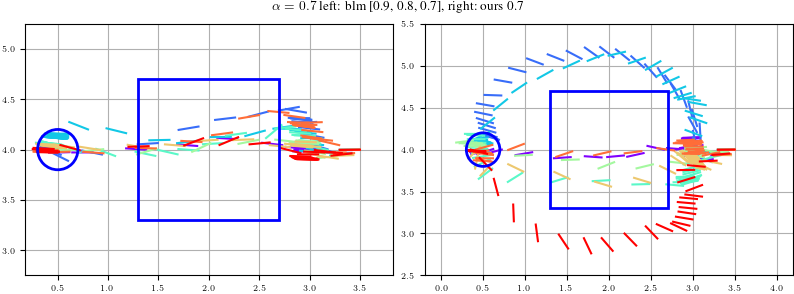

In [8]:
import math
import matplotlib.patches as patches

df_behindbox_62 = pd.read_csv(f"{data_path}/blm_hardware_alpha_l0/working_directories/62/logged_data/log_data_do.csv")
df_behindbox_67 = pd.read_csv(f"{data_path}/blm_hardware_alpha_l0/working_directories/67/logged_data/log_data_do.csv")

subsample = 15

x_behindbox_62 = [df_behindbox_62.loc[:, f'root_pos_x_{i}'].tolist()[1::subsample] for i in range(8)]
y_behindbox_62 = [df_behindbox_62.loc[:, f'root_pos_y_{i}'].tolist()[1::subsample] for i in range(8)]
yaw_behindbox_62 = [df_behindbox_62.loc[:, f'base_yaw_{i}'].tolist()[1::subsample] for i in range(8)]

x_behindbox_67 = [df_behindbox_67.loc[:, f'root_pos_x_{i}'].tolist()[1::subsample] for i in range(8)]
y_behindbox_67 = [df_behindbox_67.loc[:, f'root_pos_y_{i}'].tolist()[1::subsample] for i in range(8)]
yaw_behindbox_67 = [df_behindbox_67.loc[:, f'base_yaw_{i}'].tolist()[1::subsample] for i in range(8)]

colors = cm.rainbow(np.linspace(0, 1, 8))

def draw_line(ax,x,y,angle,length, color_):
  terminus_x = x + length * math.cos(angle)
  terminus_y = y + length * math.sin(angle)
  line = ax.plot([x, terminus_x],[y,terminus_y], color=color_)

fig, axs = plt.subplots(1, 2)


# pl.axis([-5,20,-5,40])
for j in range(8):
    for i in range(0,len(x_behindbox_62[j])):
      draw_line(axs[0], x_behindbox_62[j][i],y_behindbox_62[j][i],yaw_behindbox_62[j][i], 0.2, colors[j])
    for i in range(0,len(x_behindbox_67[j])):
      draw_line(axs[1], x_behindbox_67[j][i],y_behindbox_67[j][i],yaw_behindbox_67[j][i], 0.2, colors[j])

# axs[0].legend("1")
# axs[1].legend("2")

for ax in axs.flat:
    # ax.legend(loc='upper right')
    ax.grid(True)
    rect = patches.Rectangle((1.3, 3.3), 1.4, 1.4, linewidth=2, edgecolor='b', facecolor='none', zorder=2)
    ax.add_patch(rect)
    circ = patches.Circle((0.5, 4.0), radius=0.2, linewidth=2, edgecolor='b', facecolor='none', zorder=2)
    ax.add_patch(circ)
    ax.axis('equal')
    ax.set_xlim(0.0, 4.0)
    ax.set_ylim(2.5, 5.5)
fig.set_size_inches(8, 3)
plt.suptitle(r"$\alpha = 0.7$" + " left: blm [0.9, 0.8, 0.7], right: ours 0.7")
plt.show()


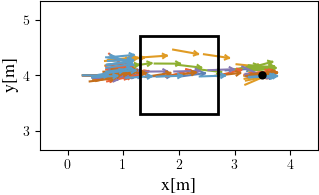

In [7]:
import math
import matplotlib.patches as patches

df_behindbox_62 = pd.read_csv(f"{data_path}/blm_hardware_alpha_l0/working_directories/62/logged_data/log_data_do.csv")

subsample = 25

x_behindbox_62 = [df_behindbox_62.loc[:, f'root_pos_x_{i}'].tolist()[1::subsample] for i in range(8)]
y_behindbox_62 = [df_behindbox_62.loc[:, f'root_pos_y_{i}'].tolist()[1::subsample] for i in range(8)]
yaw_behindbox_62 = [df_behindbox_62.loc[:, f'base_yaw_{i}'].tolist()[1::subsample] for i in range(8)]

# x_behindbox_67 = [df_behindbox_67.loc[:, f'root_pos_x_{i}'].tolist()[1::subsample] for i in range(8)]
# y_behindbox_67 = [df_behindbox_67.loc[:, f'root_pos_y_{i}'].tolist()[1::subsample] for i in range(8)]
# yaw_behindbox_67 = [df_behindbox_67.loc[:, f'base_yaw_{i}'].tolist()[1::subsample] for i in range(8)]

colors = cm.rainbow(np.linspace(0, 1, 8))

def draw_line(ax,x,y,angle,length, color_):
    half_len = length / 2
    line = ax.plot([x - half_len * math.cos(angle), x + half_len * math.cos(angle)],
                   [y - half_len * math.sin(angle), y + half_len * math.sin(angle)], color=color_)

def draw_arrow(ax,x,y,angle,length, color_):
    half_len = length / 2
    arrow_len = length / 6
    line = ax.plot([x - half_len * math.cos(angle), x + half_len * math.cos(angle)],
                   [y - half_len * math.sin(angle), y + half_len * math.sin(angle)], color=color_)
    line_1 = ax.plot([x - half_len * math.cos(angle), x - half_len * math.cos(angle) + arrow_len * math.sin(angle + 3.14/3)],
                     [y - half_len * math.sin(angle), y - half_len * math.sin(angle) - arrow_len * math.cos(angle + 3.14/3)], color=color_)
    line_3 = ax.plot([x - half_len * math.cos(angle), x - half_len * math.cos(angle) - arrow_len * math.sin(angle - 3.14/3)],
                     [y - half_len * math.sin(angle), y - half_len * math.sin(angle) + arrow_len * math.cos(angle - 3.14/3)], 
                     color=color_)

fig, ax = plt.subplots(1, 1)


# pl.axis([-5,20,-5,40])
for j in range(7):
    for i in range(0,len(x_behindbox_62[j])):
      draw_arrow(ax, 4-x_behindbox_62[j+1][i],y_behindbox_62[j][i], -yaw_behindbox_62[j][i], 0.45, COLORS[j])

# axs[0].legend("1")
# axs[1].legend("2")

# ax.legend(loc='upper right')
ax.grid(False)
rect = patches.Rectangle((1.3, 3.3), 1.4, 1.4, linewidth=2, edgecolor='black', facecolor='none', zorder=2)
ax.add_patch(rect)
circ = patches.Circle((4-0.5, 4.0), radius=0.05, linewidth=2, edgecolor='black', facecolor='black', zorder=2, alpha=1.0)
ax.add_patch(circ)
# ax.grid(True)
ax.axis('equal')
ax.set_xlim(-0.5, 4.5)
# ax.set_ylim(2.5, 5.5)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.set_ylabel('y[m]', fontsize=13)
ax.set_xlabel('x[m]', fontsize=13)
fig.savefig('/is/sg2/jcheng/Downloads/behind_box_l0_1.pdf', bbox_inches='tight')


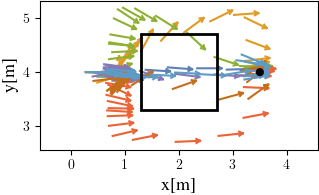

In [8]:
import math
import matplotlib.patches as patches
import pandas as pd

df_behindbox_67 = pd.read_csv(f"{data_path}/blm_hardware_alpha_l0/working_directories/67/logged_data/log_data_do.csv")

subsample = 25

x_behindbox_67 = [df_behindbox_67.loc[:, f'root_pos_x_{i}'].tolist()[1::subsample] for i in range(8)]
y_behindbox_67 = [df_behindbox_67.loc[:, f'root_pos_y_{i}'].tolist()[1::subsample] for i in range(8)]
yaw_behindbox_67 = [df_behindbox_67.loc[:, f'base_yaw_{i}'].tolist()[1::subsample] for i in range(8)]

colors = cm.rainbow(np.linspace(0, 1, 8))

def draw_line(ax,x,y,angle,length, color_):
    half_len = length / 2
    line = ax.plot([x - half_len * math.cos(angle), x + half_len * math.cos(angle)],
                   [y - half_len * math.sin(angle), y + half_len * math.sin(angle)], color=color_)

def draw_arrow(ax,x,y,angle,length, color_):
    half_len = length / 2
    arrow_len = length / 6
    line = ax.plot([x - half_len * math.cos(angle), x + half_len * math.cos(angle)],
                   [y - half_len * math.sin(angle), y + half_len * math.sin(angle)], color=color_)
    line_1 = ax.plot([x - half_len * math.cos(angle), x - half_len * math.cos(angle) + arrow_len * math.sin(angle + 3.14/3)],
                     [y - half_len * math.sin(angle), y - half_len * math.sin(angle) - arrow_len * math.cos(angle + 3.14/3)], color=color_)
    line_3 = ax.plot([x - half_len * math.cos(angle), x - half_len * math.cos(angle) - arrow_len * math.sin(angle - 3.14/3)],
                     [y - half_len * math.sin(angle), y - half_len * math.sin(angle) + arrow_len * math.cos(angle - 3.14/3)], 
                     color=color_)
    
fig, ax = plt.subplots(1, 1)


# pl.axis([-5,20,-5,40])
for j in range(7):
    for i in range(0,len(x_behindbox_67[j])):
      draw_arrow(ax, 4-x_behindbox_67[j+1][i],y_behindbox_67[j][i], -yaw_behindbox_67[j][i], 0.45, COLORS[j])

# axs[0].legend("1")
# axs[1].legend("2")

# ax.legend(loc='upper right')
ax.grid(False)
rect = patches.Rectangle((1.3, 3.3), 1.4, 1.4, linewidth=2, edgecolor='black', facecolor='none', zorder=2)
ax.add_patch(rect)
circ = patches.Circle((4-0.5, 4.0), radius=0.05, linewidth=2, edgecolor='black', facecolor='black', zorder=2, alpha=1.0)
ax.add_patch(circ)
# ax.grid(True)
ax.axis('equal')
ax.set_xlim(-0.5, 4.5)
# ax.set_ylim(2.5, 5.5)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.set_ylabel('y[m]', fontsize=13)
ax.set_xlabel('x[m]', fontsize=13)
fig.savefig('/is/sg2/jcheng/Downloads/behind_box_l0_3.pdf', bbox_inches='tight')
